In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout

In [2]:
data = pd.read_csv('./gender_classification.csv')

In [3]:
data.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [4]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.shape

(5001, 8)

In [6]:
data.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [7]:
data.isnull().mean()*100

long_hair                    0.0
forehead_width_cm            0.0
forehead_height_cm           0.0
nose_wide                    0.0
nose_long                    0.0
lips_thin                    0.0
distance_nose_to_lip_long    0.0
gender                       0.0
dtype: float64

In [8]:
data.duplicated().sum()

1768

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
le = LabelEncoder()

In [12]:
data['gender']=le.fit_transform(data['gender'])

In [13]:
data.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
5,1,13.0,6.8,1,1,1,1,1
6,1,15.3,6.2,1,1,1,0,1
7,0,13.0,5.2,0,0,0,0,0
8,1,11.9,5.4,1,0,1,1,0
9,1,12.1,5.4,0,0,0,0,0


In [14]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [15]:
sc = StandardScaler()
x = sc.fit_transform(x)

#### Inbalanced learn

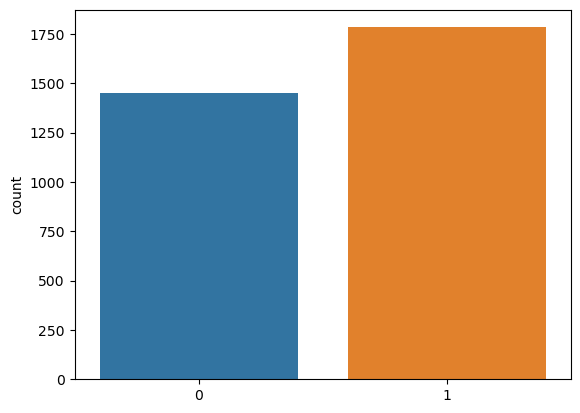

In [16]:
sns.countplot(x=y);

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
smote=SMOTE()

In [19]:
x_smote,y_smote=smote.fit_resample(x,y)

In [20]:
y_smote

array([1, 0, 1, ..., 0, 0, 0])

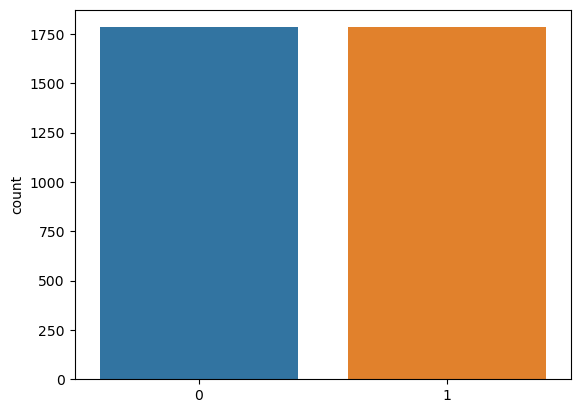

In [21]:
sns.countplot(x=y_smote);

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=0)

#### Model building

In [23]:
model = Sequential()

In [24]:
model.add(Dense(128,activation='relu', input_dim = x_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17665 (69.00 KB)
Trainable params: 17665 (69.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Compliling the model

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### Early stopping callbacks

In [27]:
early_stopping = EarlyStopping(monitor='val_loss',
                              patience= 50,
                              restore_best_weights=True,
                               verbose= 1
                              )

#### Model training

In [28]:
history = model.fit(x_train,y_train,batch_size= 32,callbacks=[early_stopping],epochs=500,validation_data=(x_test,y_test),shuffle=True)

Epoch 1/500
90/90 [==============================] - 1s 4ms/step - loss: 0.2258 - accuracy: 0.9158 - val_loss: 0.1027 - val_accuracy: 0.9538
Epoch 2/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9544 - val_loss: 0.0974 - val_accuracy: 0.9650
Epoch 3/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9555 - val_loss: 0.0985 - val_accuracy: 0.9622
Epoch 4/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9576 - val_loss: 0.0961 - val_accuracy: 0.9636
Epoch 5/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9565 - val_loss: 0.0965 - val_accuracy: 0.9594
Epoch 6/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1086 - accuracy: 0.9576 - val_loss: 0.0949 - val_accuracy: 0.9650
Epoch 7/500
90/90 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9586 - val_loss: 0.1005 - val_accuracy: 0.9580
Epoch 8/500
9

Epoch 59/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9719 - val_loss: 0.1104 - val_accuracy: 0.9552
Epoch 60/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9712 - val_loss: 0.1086 - val_accuracy: 0.9622
Epoch 61/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0735 - accuracy: 0.9709 - val_loss: 0.1084 - val_accuracy: 0.9594
Epoch 62/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9702 - val_loss: 0.1128 - val_accuracy: 0.9622
Epoch 63/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9723 - val_loss: 0.1130 - val_accuracy: 0.9608
Epoch 64/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9705 - val_loss: 0.1143 - val_accuracy: 0.9622
Epoch 65/500
90/90 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9719 - val_loss: 0.1121 - val_accuracy: 0.9622
Epoch 

##### Evaluating the model

In [29]:
history_dict=history.history

#### 1. Learning curve

In [30]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

##### 2. Loss

In [31]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

##### 3. Range of x or number of epochs in the graph

In [32]:
epochs = range(1,len(acc)+1)

#### 4.Plot

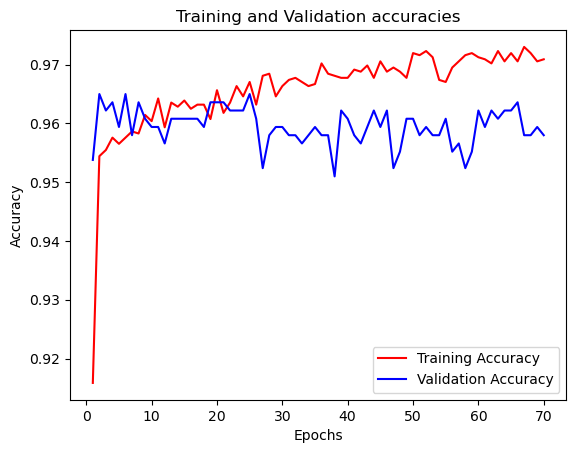

In [33]:
plt.plot(epochs, acc, 'r', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'b', label = "Validation Accuracy")
plt.title("Training and Validation accuracies")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
y_pred=model.predict(x_test)

23/23 [==============================] - 0s 1ms/step


In [35]:
y_pred=(y_pred>0.5)

In [36]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [

In [37]:
matrix = confusion_matrix(y_test,y_pred)

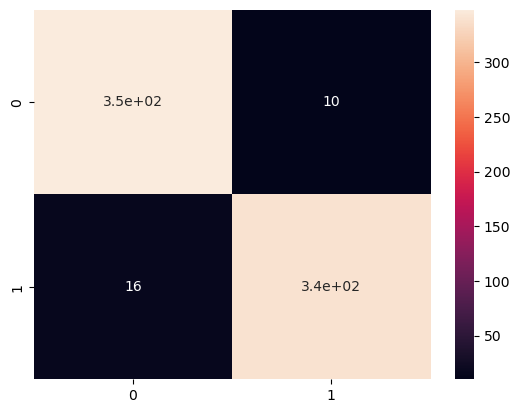

In [38]:
sns.heatmap(matrix, annot=True);

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       358
           1       0.97      0.96      0.96       356

    accuracy                           0.96       714
   macro avg       0.96      0.96      0.96       714
weighted avg       0.96      0.96      0.96       714

